### Stage 4: Full evaluation of cross validated models

this notebook is only to visualize previously collected results, which should be over the whole dataset and also per split of the dataset.
Good. A previous notebook does the actual results collection. Nice.


so we have in domain and out of domain results. we have results for each cross validated split. Noice.

#### Loading all the spreadsheet data

In [10]:
import os
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [8]:
in_domain_results = os.listdir("../results/cross_validated_results/in_domain_results")
out_domain_results = os.listdir("../results/cross_validated_results/out_domain_results")

In [9]:
in_domain_results = [i for i in in_domain_results if "individual_stats" in i]
out_domain_results = [i for i in out_domain_results if "individual_stats" in i]

In [247]:
UNCERTAINTY_TYPES = {
    "SEnt",
    "MC-Drop",
    "Ens",
    "Evid",
    "Ind",
    "P-Unet",
    "SSN",
    "SSN-Ens",
}

In [144]:
def convert_files_to_large_df(folder, filenames):
    dfs = []
    for fn in filenames:
        df = pd.read_csv(os.path.join(folder, fn))
        if "_evidential_b" in fn:
            uncertainty_type = "Evid"
        elif "_deterministic_b" in fn:
            uncertainty_type = "SEnt"
        elif "_ind_b" in fn:
            uncertainty_type = "Ind"
        elif "_punet_b" in fn:
            uncertainty_type = "P-Unet"
        elif "_ens_b" in fn and "ssn" not in fn:
            uncertainty_type = "Ens"
        elif "_mc_drop_b" in fn:
            uncertainty_type = "MC-Drop"
        elif "_ssn_ens_b" in fn:
            uncertainty_type = "SSN-Ens"
        elif "_ssn_b" in fn:
            uncertainty_type = "SSN"
        else:
            print("uncertainty type unclear for ", fn)
            
        cv_fold = fn.split("_")[-3][-1]
        
        df['uncertainty_type'] = [uncertainty_type for _ in range(len(df))]
        df['cv_fold'] = [cv_fold for _ in range(len(df))]
        
        dfs.append(df)
    
    return pd.concat(dfs)

In [145]:
in_domain_df = convert_files_to_large_df("../results/cross_validated_results/in_domain_results", in_domain_results)
out_domain_df = convert_files_to_large_df("../results/cross_validated_results/out_domain_results", out_domain_results)

uncertainty type unclear for  ssn_prehead16_rank15_sdice0_individual_stats.csv


In [146]:
in_domain_df

,Unnamed: 0,dice,hd95,avd,recall,f1,rmse,gt_vols,p_acc_cert_0.00,p_uncert_inacc_0.00,...,sample_1_vd,sample_2_vd,sample_3_vd,sample_4_vd,sample_5_vd,sample_6_vd,sample_7_vd,sample_8_vd,sample_9_vd,GED^2
0,0,0.459,8.602,52.707,0.413,0.519,0.382,"2,290.000",0.000,1.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,0.852,2.449,8.082,0.540,0.597,0.385,"19,229",0.000,1.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,0.636,5.385,18.417,0.768,0.752,0.383,"3,486.000",0.000,1.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,0.528,7.280,42.520,0.354,0.435,0.382,"1,738.000",0.000,1.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,0.880,2.449,0.827,0.450,0.497,0.387,"27,193",0.000,1.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37,37,0.449,8.602,153.343,0.418,0.481,0.810,"2,782.000",0.000,1.000,...,101.725,121.531,131.884,142.200,170.309,189.037,204.853,241.014,287.132,1.180
38,38,0.762,1.732,30.703,0.652,0.667,0.562,"7,097.000",0.000,1.000,...,4.875,13.527,19.980,24.123,36.311,40.792,51.106,62.956,84.599,0.591
39,39,0.644,8.602,36.602,0.425,0.573,0.612,"9,453.000",0.000,1.000,...,-49.487,-45.414,-41.140,-37.988,-34.370,-31.006,-26.775,-22.088,-11.002,0.827
40,40,0.823,5.099,2.807,0.649,0.671,0.516,"16,141",0.000,1.000,...,-16.542,-12.570,-8.630,-5.217,0.434,4.008,9.367,14.919,22.818,0.463


In [20]:
in_domain_df.keys()

Index(['Unnamed: 0', 'dice', 'hd95', 'avd', 'recall', 'f1', 'rmse', 'gt_vols',
       'p_acc_cert_0.00', 'p_uncert_inacc_0.00',
       ...
       'sample_1_vd', 'sample_2_vd', 'sample_3_vd', 'sample_4_vd',
       'sample_5_vd', 'sample_6_vd', 'sample_7_vd', 'sample_8_vd',
       'sample_9_vd', 'GED^2'],
      dtype='object', length=587)

<Axes: xlabel='uncertainty_type', ylabel='dice'>

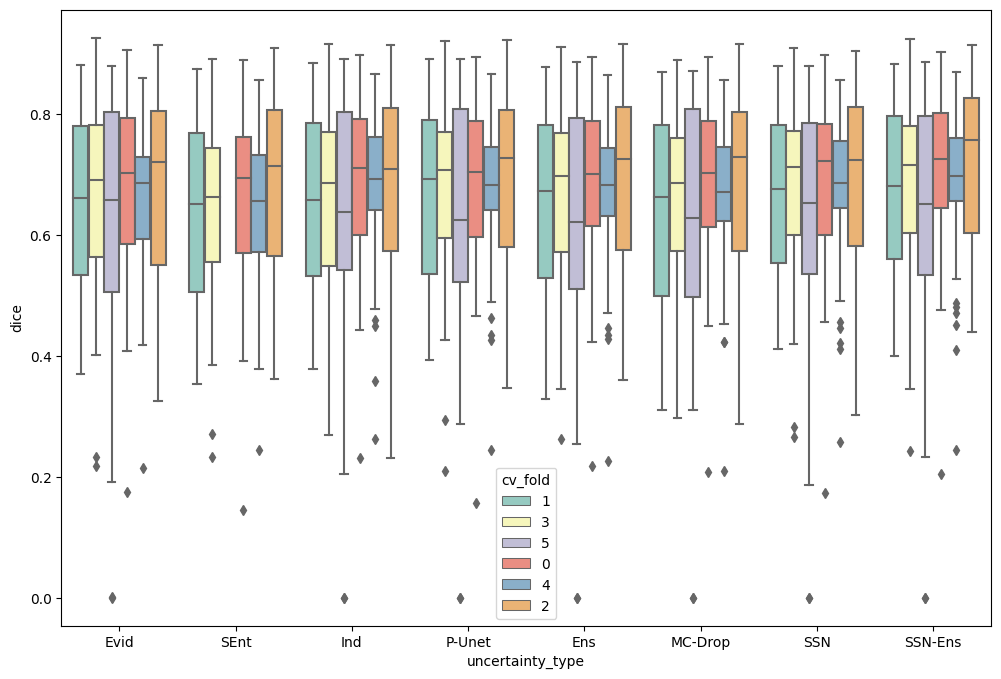

In [22]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='uncertainty_type', y='dice', data=in_domain_df, hue='cv_fold', palette='Set3')


In [152]:
pd.set_option('display.float_format',
      lambda x: '{:,.3f}'.format(x) if abs(x) < 10000 else '{:,.0f}'.format(x))

In [151]:
from scipy.stats import t
def mean_and_95_conf_over_cvfold(df, metric):
    cv_scores = df.groupby(['uncertainty_type', 'cv_fold'])[metric].mean().groupby('uncertainty_type')
    mean = cv_scores.mean().rename(f"{metric} mean", axis='index')
    std = cv_scores.std(ddof=1)
    size = cv_scores.size()
    sem_value = std / (np.sqrt(size))
    
    confidence_level = 0.95
    degrees_of_freedom = size - 1
    margin_of_error = t.ppf((1 + confidence_level) / 2, degrees_of_freedom) * sem_value
    margin_of_error = margin_of_error.rename(f"{metric} 95%")
    confidence_interval = (mean - margin_of_error, mean + margin_of_error)
    
    return pd.concat([mean, margin_of_error], axis=1)#, confidence_interval[0], confidence_interval[1]], axis=1)

In [248]:
def plot_metric_for_all_thresholds_95(df, metric, ylim=None):
    thresholds = np.arange(0, 0.7, 0.01)
    dfs = []
    # get a mean and conf interval for these curves.
    for t in thresholds:
        dfs.append(mean_and_95_conf_over_cvfold(df, f"{metric}_{t:.2f}"))
    tmetric_df = pd.concat(dfs, axis=1)
    
    mean_cols = [f"{metric}_{t:.2f} mean" for t in thresholds]
    conf_cols = [f"{metric}_{t:.2f} 95%" for t in thresholds]
    
    for key in UNCERTAINTY_TYPES:
        mean = tmetric_df[mean_cols].loc[key].values
        conf = tmetric_df[conf_cols].loc[key].values
        sns.lineplot(x=thresholds, y=mean, label=key)
        plt.fill_between(thresholds, mean - conf, mean + conf, alpha=0.1)
    plt.ylim(ylim)
    plt.xlabel("uncertainty threshold")
    plt.ylabel(f"{metric}")

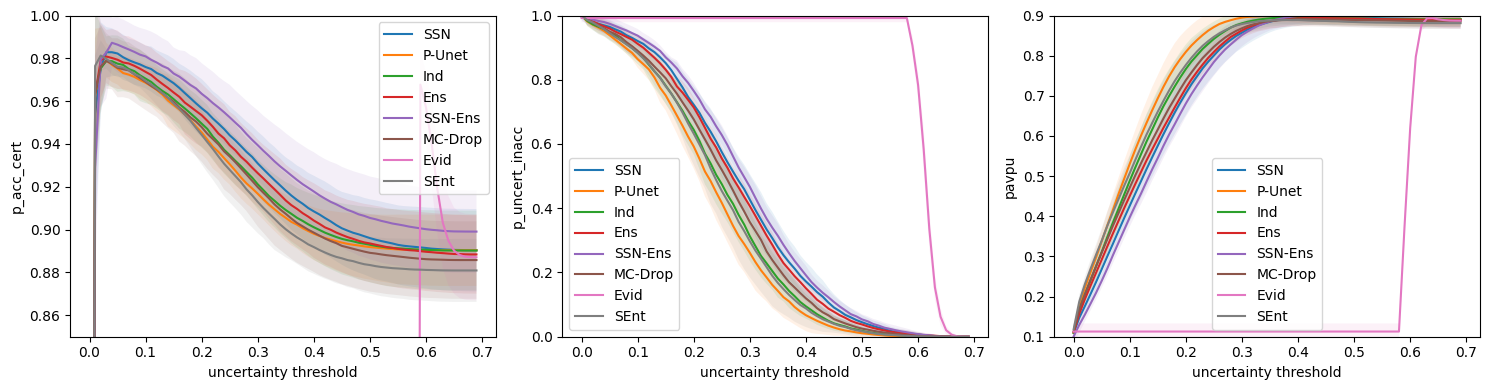

In [249]:
plt.figure(figsize=(15, 4))
thresholds = np.arange(0, 0.7, 0.01)
plt.subplot(1,3,1)
metric = "p_acc_cert"
tmetric_df = plot_metric_for_all_thresholds_95(in_domain_df, metric, (0.85, 1))
plt.subplot(1,3,2)
metric = "p_uncert_inacc"
tmetric_df = plot_metric_for_all_thresholds_95(in_domain_df, metric, (0, 1))
plt.subplot(1,3,3)
metric = "pavpu"
tmetric_df = plot_metric_for_all_thresholds_95(in_domain_df, metric, (0.1, 0.9))
plt.tight_layout()

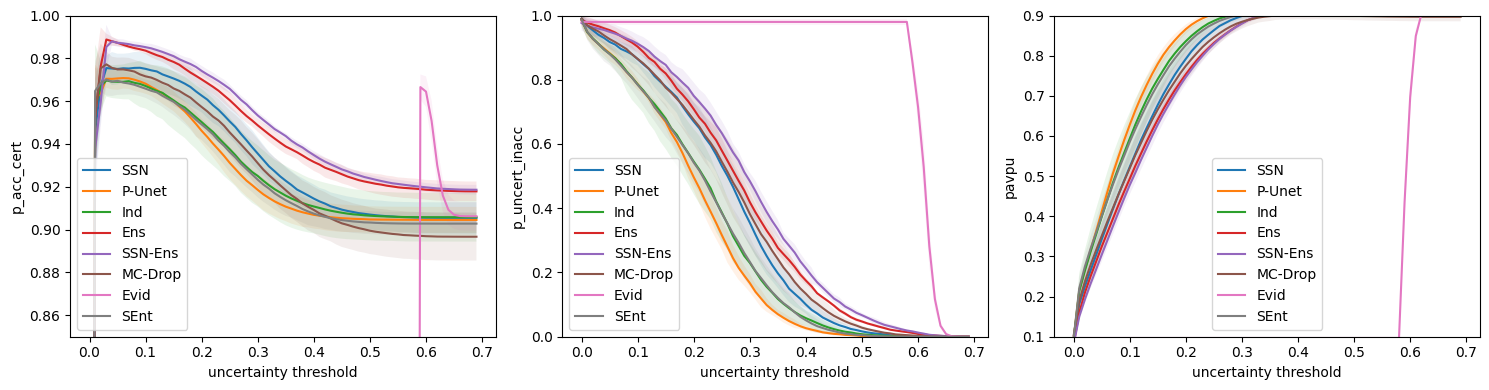

In [250]:
plt.figure(figsize=(15, 4))
thresholds = np.arange(0, 0.7, 0.01)
plt.subplot(1,3,1)
metric = "p_acc_cert"
tmetric_df = plot_metric_for_all_thresholds_95(out_domain_df, metric, (0.85, 1))
plt.subplot(1,3,2)
metric = "p_uncert_inacc"
tmetric_df = plot_metric_for_all_thresholds_95(out_domain_df, metric, (0, 1))
plt.subplot(1,3,3)
metric = "pavpu"
tmetric_df = plot_metric_for_all_thresholds_95(out_domain_df, metric, (0.1, 0.9))
plt.tight_layout()

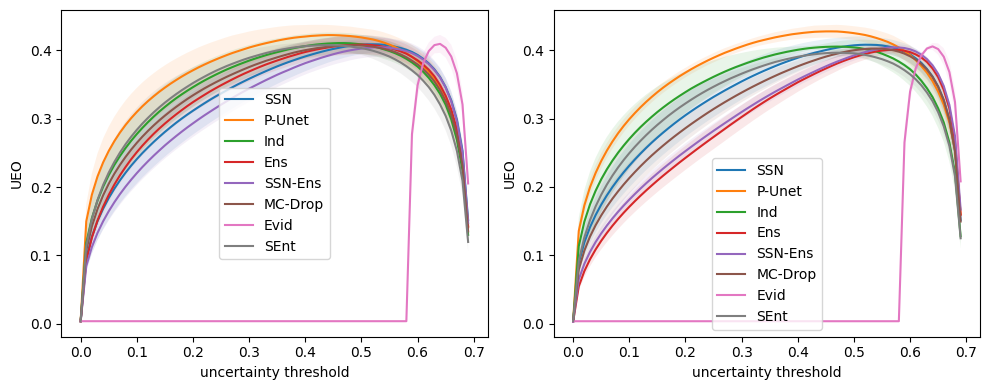

In [251]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
metric = "UEO"
tmetric_df = plot_metric_for_all_thresholds_95(in_domain_df, metric)
plt.subplot(1,2,2)
metric = "UEO"
tmetric_df = plot_metric_for_all_thresholds_95(out_domain_df, metric)
plt.tight_layout()

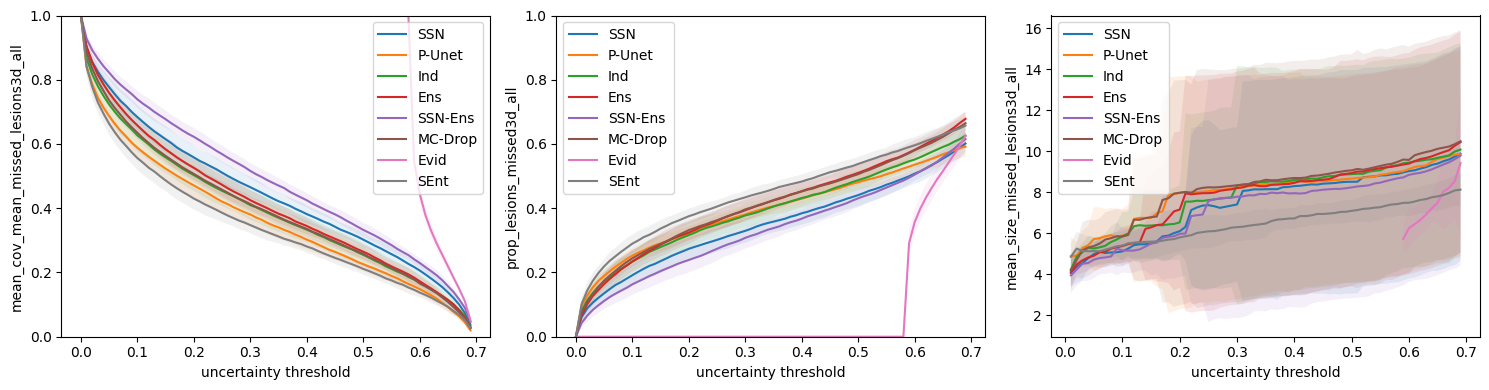

In [256]:
plt.figure(figsize=(15, 4))
thresholds = np.arange(0, 0.7, 0.01)
plt.subplot(1,3,1)
metric = "mean_cov_mean_missed_lesions3d_all"
tmetric_df = plot_metric_for_all_thresholds_95(in_domain_df, metric, (0, 1))
plt.subplot(1,3,2)
metric = "prop_lesions_missed3d_all"
tmetric_df = plot_metric_for_all_thresholds_95(in_domain_df, metric, (0, 1))
plt.subplot(1,3,3)
metric = "mean_size_missed_lesions3d_all"
tmetric_df = plot_metric_for_all_thresholds_95(in_domain_df, metric)
plt.tight_layout()

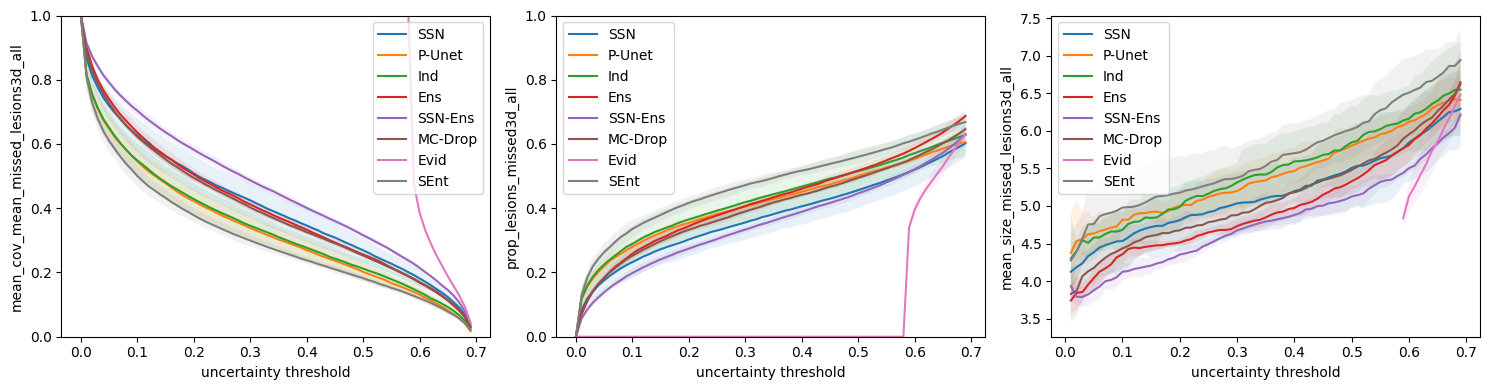

In [257]:
plt.figure(figsize=(15, 4))
thresholds = np.arange(0, 0.7, 0.01)
plt.subplot(1,3,1)
metric = "mean_cov_mean_missed_lesions3d_all"
tmetric_df = plot_metric_for_all_thresholds_95(out_domain_df, metric, (0, 1))
plt.subplot(1,3,2)
metric = "prop_lesions_missed3d_all"
tmetric_df = plot_metric_for_all_thresholds_95(out_domain_df, metric, (0, 1))
plt.subplot(1,3,3)
metric = "mean_size_missed_lesions3d_all"
tmetric_df = plot_metric_for_all_thresholds_95(out_domain_df, metric)
plt.tight_layout()

In [261]:
dfs = []
for key in ["dice", "best_dice", "avd", "best_avd", "recall", "f1"]:
    dfs.append(mean_and_95_conf_over_cvfold(in_domain_df, key))
standard_metrics_df = pd.concat(dfs, axis=1)
standard_metrics_df

,dice mean,dice 95%,best_dice mean,best_dice 95%,avd mean,avd 95%,best_avd mean,best_avd 95%,recall mean,recall 95%,f1 mean,f1 95%
uncertainty_type,,,,,,,,,,,,
Ens,0.658,0.031,0.671,0.029,30.144,5.169,11.450,5.645,0.427,0.025,0.511,0.030
Evid,0.657,0.025,NaN,NaN,30.342,4.573,NaN,NaN,0.499,0.048,0.502,0.021
Ind,0.663,0.026,0.665,0.026,30.628,5.605,29.359,5.160,0.510,0.042,0.537,0.027
MC-Drop,0.654,0.032,0.671,0.030,29.933,5.565,13.633,5.595,0.452,0.043,0.510,0.033
P-Unet,0.666,0.026,0.670,0.024,29.946,4.975,24.022,2.301,0.541,0.036,0.540,0.025
SEnt,0.652,0.021,NaN,NaN,30.240,5.474,NaN,NaN,0.463,0.031,0.502,0.011
SSN,0.667,0.025,0.690,0.025,30.698,7.797,7.037,3.178,0.529,0.042,0.543,0.036
SSN-Ens,0.680,0.031,0.694,0.029,28.720,5.410,5.943,3.818,0.510,0.027,0.561,0.030


In [263]:
dfs = []
for key in ["dice", "best_dice", "avd", "best_avd", "recall", "f1"]:
    dfs.append(mean_and_95_conf_over_cvfold(out_domain_df, key))
standard_metrics_df = pd.concat(dfs, axis=1)
standard_metrics_df

,dice mean,dice 95%,best_dice mean,best_dice 95%,avd mean,avd 95%,best_avd mean,best_avd 95%,recall mean,recall 95%,f1 mean,f1 95%
uncertainty_type,,,,,,,,,,,,
Ens,0.593,0.012,0.603,0.008,100.535,13.611,37.810,7.759,0.419,0.014,0.402,0.009
Evid,0.578,0.016,NaN,NaN,112.261,16.423,NaN,NaN,0.486,0.031,0.385,0.025
Ind,0.588,0.023,0.590,0.024,95.059,27.107,92.817,26.718,0.494,0.069,0.410,0.024
MC-Drop,0.552,0.023,0.574,0.023,147.728,22.141,87.236,20.720,0.464,0.016,0.361,0.020
P-Unet,0.580,0.022,0.589,0.025,104.433,21.603,84.675,24.586,0.522,0.009,0.400,0.040
SEnt,0.549,0.019,NaN,NaN,134.262,19.047,NaN,NaN,0.444,0.020,0.341,0.018
SSN,0.583,0.014,0.625,0.015,118.348,25.862,41.595,21.170,0.525,0.045,0.398,0.011
SSN-Ens,0.628,0.004,0.652,0.006,69.484,9.499,15.657,3.648,0.492,0.012,0.461,0.011


In [262]:
dfs = []
for key in ["rmse", "best_rmse", "sUEO", "GED^2"]:
    dfs.append(mean_and_95_conf_over_cvfold(in_domain_df, key))
uncert_metrics_df = pd.concat(dfs, axis=1)
uncert_metrics_df

,rmse mean,rmse 95%,best_rmse mean,best_rmse 95%,sUEO mean,sUEO 95%,GED^2 mean,GED^2 95%
uncertainty_type,,,,,,,,
Ens,0.572,0.012,0.551,0.013,0.455,0.015,0.696,0.040
Evid,0.383,0.000,NaN,NaN,0.007,0.001,NaN,NaN
Ind,0.563,0.017,0.562,0.017,0.463,0.019,0.933,0.040
MC-Drop,0.569,0.010,0.549,0.011,0.458,0.015,0.770,0.039
P-Unet,0.579,0.020,0.566,0.019,0.477,0.016,0.920,0.029
SEnt,0.577,0.018,NaN,NaN,0.461,0.007,NaN,NaN
SSN,0.566,0.014,0.542,0.018,0.452,0.023,0.702,0.019
SSN-Ens,0.564,0.014,0.539,0.016,0.442,0.019,0.637,0.036


In [264]:
dfs = []
for key in ["rmse", "best_rmse", "sUEO", "GED^2"]:
    dfs.append(mean_and_95_conf_over_cvfold(out_domain_df, key))
uncert_metrics_df = pd.concat(dfs, axis=1)
uncert_metrics_df

,rmse mean,rmse 95%,best_rmse mean,best_rmse 95%,sUEO mean,sUEO 95%,GED^2 mean,GED^2 95%
uncertainty_type,,,,,,,,
Ens,0.579,0.012,0.542,0.008,0.403,0.014,0.701,0.019
Evid,0.383,0.000,NaN,NaN,0.007,0.000,NaN,NaN
Ind,0.588,0.024,0.587,0.024,0.454,0.003,1.083,0.060
MC-Drop,0.588,0.021,0.560,0.021,0.432,0.009,0.858,0.030
P-Unet,0.619,0.009,0.597,0.018,0.477,0.007,1.079,0.059
SEnt,0.593,0.016,NaN,NaN,0.443,0.004,NaN,NaN
SSN,0.595,0.020,0.561,0.018,0.448,0.020,0.838,0.047
SSN-Ens,0.577,0.006,0.538,0.006,0.413,0.008,0.664,0.009


### Plotting left to do
- [ ] run experiment to get missing result for sent
- [ ] modify code to be able to collect cv5 for the Challenge dataset. Noice.
- [ ] fix evid
- [ ] can GED be > 1 ?
- [ ] sample VD per volume
- [ ] rmse per volume 
- [ ] is pavpu broken? ssn ens has higher p_acc_cert and p_uncert_inacc but lower pavpu?
- [ ] plot the covereage metrics as maximum UEO for each method.
- [ ] provide some visual examples of the differences.